# Imports

In [1]:
# Standard imports
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

In [2]:
# Importing our own code
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

# Load the Dataset

In [3]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

### Structure of the dataset

Each dataset *split* (train or valid or test) is represented as a *tuple* of 3 values:

* a 1D array of user_ids
* a 1D array of item_ids
* a 1D array of ratings

In [4]:
n_train_examples = len(train_tuple[0])
N = n_train_examples

# Unpack the tuple into its three contained arrays
userids_tr_N = train_tuple[0]
itemids_tr_N = train_tuple[1]
ratings_tr_N = train_tuple[2]

n_validation_examples = len(valid_tuple[0])
M = n_validation_examples
userids_va_M = valid_tuple[0]
itemids_va_M = valid_tuple[1]
ratings_va_M = valid_tuple[2]

n_test_examples = len(test_tuple[0])
T = n_test_examples

In [5]:
test_tuple

(array([772, 471, 641, ..., 926, 522, 788]),
 array([ 36, 228, 401, ...,  94, 547, 247]),
 array([3, 5, 4, ..., 5, 4, 3]))

### Print first 5 values in each array

We should see that:

* user 662 gave movie 761 a 5
* user 298 gave movie 90 a 4
* user 90 gave movie 349 a 4
* user 912 gave movie 917 a 4
* user 302 gave movie 42 a 3

In [6]:
print(userids_tr_N[:5])
print(itemids_tr_N[:5])
print(ratings_tr_N[:5])

[662 298  90 912 302]
[761  90 349 917  42]
[5 4 4 4 3]


### Load Movie Info

In [7]:
DATA_PATH = 'data_movie_lens_100k'

In [8]:
movie_df = pd.read_csv(os.path.join(DATA_PATH, 'movie_info.csv'))

In [9]:
movie_df.head()

,item_id,title,release_year,orig_item_id
0,0,Toy Story (1995),1995,1
1,1,GoldenEye (1995),1995,2
2,2,Four Rooms (1995),1995,3
3,3,Get Shorty (1995),1995,4
4,4,Copycat (1995),1995,5


### Load User Info

In [10]:
user_df = pd.read_csv(os.path.join(DATA_PATH, 'user_info.csv'))

In [11]:
user_df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


# Problem 1 - Analysis Tasks

# 1A - Implementation Step 3i

In [12]:
batch_size = 1000 # Fix batch size for all of problem 1
random_state = 42 # fix random state for reproducibility

In [14]:
# Step 3(i)
# With no regularization (alpha=0) train a CollabFilterOneVectorPerItem using SGD.
# Try three possible values of K: 2, 10, and 50
kValues = [2, 10, 50]
rmse_tuples = []
finalRMSEs = []
for k in kValues:
    model = CollabFilterOneVectorPerItem(
        n_epochs=200, batch_size=batch_size, step_size=0.5, n_factors=k, alpha=0.0, random_state=random_state
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    rmse_tuples.append((k, model.trace_epoch, model.trace_rmse_train, model.trace_rmse_valid))
    finalRMSEs.append((k, model.trace_rmse_train[-1], model.trace_rmse_valid[-1]))
    
    fileName = f"problem1aparamsk{k}.pkl"
    with open(fileName, 'wb') as f:
        pickle.dump(model.param_dict, f)

epoch       0.000 | loss_total    13.93907 | tr RMSE     3.74203 | va RMSE     3.72423 | grad_wrt_mu     5.79580 | grad_wrt_b_per_user     0.00636 | grad_wrt_c_per_item     0.00364 | grad_wrt_U     0.00428 | grad_wrt_V     0.00241
epoch       0.014 | loss_total     5.20959 | tr RMSE     2.29806 | va RMSE     2.28863 | grad_wrt_mu     0.33912 | grad_wrt_b_per_user     0.00289 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00276 | grad_wrt_V     0.00161
epoch       0.029 | loss_total     5.44474 | tr RMSE     2.29587 | va RMSE     2.28780 | grad_wrt_mu     0.15733 | grad_wrt_b_per_user     0.00310 | grad_wrt_c_per_item     0.00173 | grad_wrt_U     0.00280 | grad_wrt_V     0.00162
epoch       0.043 | loss_total     5.20244 | tr RMSE     2.28695 | va RMSE     2.27858 | grad_wrt_mu     0.21902 | grad_wrt_b_per_user     0.00279 | grad_wrt_c_per_item     0.00176 | grad_wrt_U     0.00273 | grad_wrt_V     0.00168
epoch       0.129 | loss_total     5.08150 | tr RMSE     2.25556 | va RMSE  

epoch      17.000 | loss_total     1.21781 | tr RMSE     1.09542 | va RMSE     1.15981 | grad_wrt_mu     0.04834 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00065 | grad_wrt_V     0.00033
epoch      18.000 | loss_total     1.19171 | tr RMSE     1.08388 | va RMSE     1.14893 | grad_wrt_mu     0.05573 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00064 | grad_wrt_V     0.00030
epoch      19.000 | loss_total     1.16952 | tr RMSE     1.07324 | va RMSE     1.13895 | grad_wrt_mu     0.14878 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00066 | grad_wrt_V     0.00031
epoch      20.000 | loss_total     1.14452 | tr RMSE     1.06347 | va RMSE     1.12986 | grad_wrt_mu     0.11280 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00065 | grad_wrt_V     0.00029
epoch      21.000 | loss_total     1.12392 | tr RMSE     1.05471 | va RMSE  

epoch      74.000 | loss_total     0.85657 | tr RMSE     0.92378 | va RMSE     1.00130 | grad_wrt_mu     0.02082 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00018
epoch      76.000 | loss_total     0.85533 | tr RMSE     0.92267 | va RMSE     1.00090 | grad_wrt_mu     0.04668 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      78.000 | loss_total     0.85150 | tr RMSE     0.92113 | va RMSE     0.99934 | grad_wrt_mu     0.07443 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.85089 | tr RMSE     0.91996 | va RMSE     0.99842 | grad_wrt_mu     0.15036 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      82.000 | loss_total     0.84788 | tr RMSE     0.91890 | va RMSE  

epoch     172.000 | loss_total     0.80138 | tr RMSE     0.89348 | va RMSE     0.98399 | grad_wrt_mu     0.02468 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch     176.000 | loss_total     0.80084 | tr RMSE     0.89280 | va RMSE     0.98336 | grad_wrt_mu     0.01113 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00018
epoch     180.000 | loss_total     0.79953 | tr RMSE     0.89234 | va RMSE     0.98403 | grad_wrt_mu     0.09941 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch     184.000 | loss_total     0.79741 | tr RMSE     0.89122 | va RMSE     0.98306 | grad_wrt_mu     0.07057 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch     188.000 | loss_total     0.79677 | tr RMSE     0.89142 | va RMSE  

epoch       9.000 | loss_total     2.43764 | tr RMSE     1.51713 | va RMSE     1.72088 | grad_wrt_mu     0.04281 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00103 | grad_wrt_V     0.00055
epoch      10.000 | loss_total     2.23657 | tr RMSE     1.45748 | va RMSE     1.66772 | grad_wrt_mu     0.09547 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00095 | grad_wrt_V     0.00050
epoch      11.000 | loss_total     2.07252 | tr RMSE     1.40824 | va RMSE     1.62388 | grad_wrt_mu     0.23430 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00088 | grad_wrt_V     0.00045
epoch      12.000 | loss_total     1.93971 | tr RMSE     1.36292 | va RMSE     1.58305 | grad_wrt_mu     0.02151 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00086 | grad_wrt_V     0.00044
epoch      13.000 | loss_total     1.82554 | tr RMSE     1.32497 | va RMSE  

epoch      62.000 | loss_total     0.82920 | tr RMSE     0.90607 | va RMSE     1.17146 | grad_wrt_mu     0.04857 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      64.000 | loss_total     0.82128 | tr RMSE     0.90267 | va RMSE     1.16855 | grad_wrt_mu     0.00778 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00040 | grad_wrt_V     0.00018
epoch      66.000 | loss_total     0.81564 | tr RMSE     0.89889 | va RMSE     1.16574 | grad_wrt_mu     0.06455 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00037 | grad_wrt_V     0.00019
epoch      68.000 | loss_total     0.80983 | tr RMSE     0.89575 | va RMSE     1.16318 | grad_wrt_mu     0.05537 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00019
epoch      70.000 | loss_total     0.80480 | tr RMSE     0.89289 | va RMSE  

epoch     144.000 | loss_total     0.69892 | tr RMSE     0.83279 | va RMSE     1.13442 | grad_wrt_mu     0.13865 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00037 | grad_wrt_V     0.00018
epoch     148.000 | loss_total     0.69676 | tr RMSE     0.83085 | va RMSE     1.13441 | grad_wrt_mu     0.02671 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     152.000 | loss_total     0.69222 | tr RMSE     0.82846 | va RMSE     1.13376 | grad_wrt_mu     0.03155 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     156.000 | loss_total     0.68780 | tr RMSE     0.82663 | va RMSE     1.13388 | grad_wrt_mu     0.10757 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     160.000 | loss_total     0.68449 | tr RMSE     0.82487 | va RMSE  

epoch       5.000 | loss_total     9.39295 | tr RMSE     2.79593 | va RMSE     4.05863 | grad_wrt_mu     0.27782 | grad_wrt_b_per_user     0.00331 | grad_wrt_c_per_item     0.00183 | grad_wrt_U     0.00218 | grad_wrt_V     0.00119
epoch       5.500 | loss_total     8.36359 | tr RMSE     2.65725 | va RMSE     3.95704 | grad_wrt_mu     0.18031 | grad_wrt_b_per_user     0.00311 | grad_wrt_c_per_item     0.00178 | grad_wrt_U     0.00201 | grad_wrt_V     0.00108
epoch       6.000 | loss_total     7.51088 | tr RMSE     2.52379 | va RMSE     3.86151 | grad_wrt_mu     0.25266 | grad_wrt_b_per_user     0.00290 | grad_wrt_c_per_item     0.00177 | grad_wrt_U     0.00194 | grad_wrt_V     0.00107
epoch       6.500 | loss_total     6.83613 | tr RMSE     2.41353 | va RMSE     3.78099 | grad_wrt_mu     0.01952 | grad_wrt_b_per_user     0.00283 | grad_wrt_c_per_item     0.00173 | grad_wrt_U     0.00191 | grad_wrt_V     0.00101
epoch       7.000 | loss_total     6.18015 | tr RMSE     2.30575 | va RMSE  

epoch      46.000 | loss_total     0.69630 | tr RMSE     0.81689 | va RMSE     2.52663 | grad_wrt_mu     0.09668 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00044 | grad_wrt_V     0.00021
epoch      48.000 | loss_total     0.67402 | tr RMSE     0.80374 | va RMSE     2.51444 | grad_wrt_mu     0.07773 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      50.000 | loss_total     0.65337 | tr RMSE     0.79179 | va RMSE     2.50326 | grad_wrt_mu     0.02007 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      52.000 | loss_total     0.63557 | tr RMSE     0.78127 | va RMSE     2.49311 | grad_wrt_mu     0.02266 | grad_wrt_b_per_user     0.00085 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      54.000 | loss_total     0.61866 | tr RMSE     0.77091 | va RMSE  

epoch     118.000 | loss_total     0.40171 | tr RMSE     0.62469 | va RMSE     2.35977 | grad_wrt_mu     0.07556 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     120.000 | loss_total     0.39934 | tr RMSE     0.62254 | va RMSE     2.35859 | grad_wrt_mu     0.03188 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00027 | grad_wrt_V     0.00013
epoch     122.000 | loss_total     0.39626 | tr RMSE     0.62042 | va RMSE     2.35741 | grad_wrt_mu     0.05193 | grad_wrt_b_per_user     0.00066 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00028 | grad_wrt_V     0.00013
epoch     124.000 | loss_total     0.39380 | tr RMSE     0.61837 | va RMSE     2.35624 | grad_wrt_mu     0.10262 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00029 | grad_wrt_V     0.00013
epoch     126.000 | loss_total     0.39024 | tr RMSE     0.61555 | va RMSE  

In [15]:
for tup in finalRMSEs:
    print(f"K={tup[0]}: Train RMSE: {ag_np.round(tup[1], 3)}, Valid RMSE: {ag_np.round(tup[2], 3)}")

K=2: Train RMSE: 0.889, Valid RMSE: 0.982
K=10: Train RMSE: 0.809, Valid RMSE: 1.137
K=50: Train RMSE: 0.557, Valid RMSE: 2.344


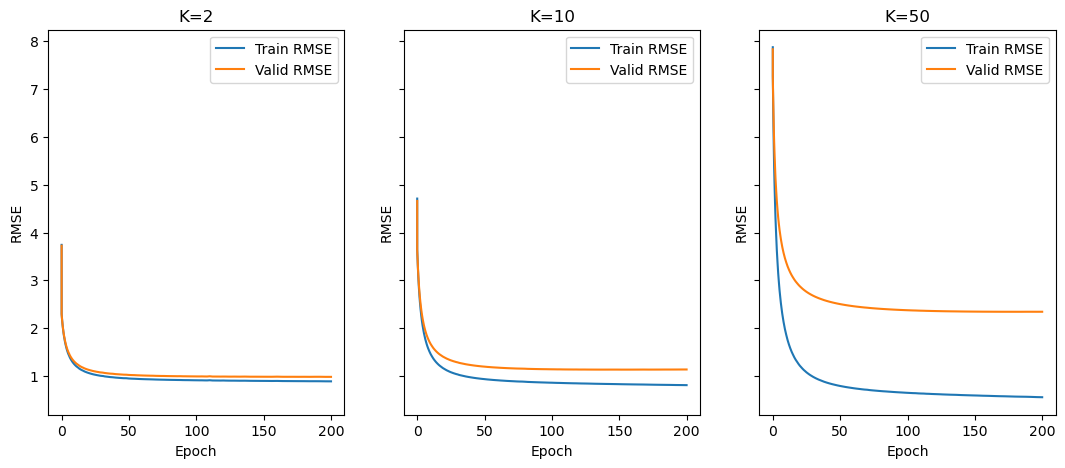

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(13,5), sharey=True)
for i, tup in enumerate(rmse_tuples):
    ax[i].plot(tup[1], tup[2], label='Train RMSE')
    ax[i].plot(tup[1], tup[3], label='Valid RMSE')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('RMSE')
    ax[i].set_title(f"K={tup[0]}")
    ax[i].legend()
plt.show()

# 1B - Implementation Step 3ii

In [64]:
# Step 3(ii)
# Train with K = 50 now with moderate regularization by setting strength alpha > 0 
# to try to eliminate overfitting you saw in 3(i)
# Focus only on K = 50

K = 50
alpha = 0.25
model = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=batch_size, step_size=0.5, n_factors=K, alpha=alpha, random_state=random_state
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    94.04307 | tr RMSE     7.87376 | va RMSE     7.83146 | grad_wrt_mu     5.32992 | grad_wrt_b_per_user     0.00994 | grad_wrt_c_per_item     0.00563 | grad_wrt_U     0.00811 | grad_wrt_V     0.00493
epoch       0.014 | loss_total    83.86753 | tr RMSE     7.27755 | va RMSE     7.24485 | grad_wrt_mu     1.08208 | grad_wrt_b_per_user     0.00778 | grad_wrt_c_per_item     0.00470 | grad_wrt_U     0.00748 | grad_wrt_V     0.00444
epoch       0.029 | loss_total    81.55096 | tr RMSE     7.24213 | va RMSE     7.21896 | grad_wrt_mu     1.15409 | grad_wrt_b_per_user     0.00795 | grad_wrt_c_per_item     0.00481 | grad_wrt_U     0.00711 | grad_wrt_V     0.00442
epoch       0.043 | loss_total    83.50588 | tr RMSE     7.20416 | va RMSE     7.18997 | grad_wrt_mu     0.44186 | grad_wrt_b_per_user     0.00817 | grad_wrt_c_per_item     0.00487 | grad_wrt_U     0.00736 | grad_wrt_V     0.00457
epoch       0.129 | loss_total    79.14256 | tr RMSE     6.97317 | va RMSE  

epoch      13.000 | loss_total    17.95636 | tr RMSE     1.33540 | va RMSE     2.31515 | grad_wrt_mu     0.09929 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00091 | grad_wrt_V     0.00062
epoch      14.000 | loss_total    17.15579 | tr RMSE     1.27145 | va RMSE     2.22748 | grad_wrt_mu     0.03062 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00087 | grad_wrt_V     0.00060
epoch      15.000 | loss_total    16.41295 | tr RMSE     1.21798 | va RMSE     2.14846 | grad_wrt_mu     0.05047 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00080 | grad_wrt_V     0.00056
epoch      16.000 | loss_total    15.73094 | tr RMSE     1.16842 | va RMSE     2.07469 | grad_wrt_mu     0.07136 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00078 | grad_wrt_V     0.00054
epoch      17.000 | loss_total    15.09334 | tr RMSE     1.12644 | va RMSE  

epoch      66.000 | loss_total     3.21689 | tr RMSE     0.79474 | va RMSE     1.04279 | grad_wrt_mu     0.02932 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00024 | grad_wrt_V     0.00019
epoch      68.000 | loss_total     3.05971 | tr RMSE     0.79592 | va RMSE     1.03546 | grad_wrt_mu     0.03102 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00023 | grad_wrt_V     0.00018
epoch      70.000 | loss_total     2.91150 | tr RMSE     0.79769 | va RMSE     1.02915 | grad_wrt_mu     0.06169 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00022 | grad_wrt_V     0.00018
epoch      72.000 | loss_total     2.77363 | tr RMSE     0.79743 | va RMSE     1.02259 | grad_wrt_mu     0.10150 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00022 | grad_wrt_V     0.00017
epoch      74.000 | loss_total     2.64452 | tr RMSE     0.79900 | va RMSE  

epoch     148.000 | loss_total     0.99211 | tr RMSE     0.83187 | va RMSE     0.94722 | grad_wrt_mu     0.00092 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch     152.000 | loss_total     0.97349 | tr RMSE     0.83369 | va RMSE     0.94648 | grad_wrt_mu     0.05162 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     156.000 | loss_total     0.95506 | tr RMSE     0.83376 | va RMSE     0.94510 | grad_wrt_mu     0.08912 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00010 | grad_wrt_V     0.00008
epoch     160.000 | loss_total     0.94051 | tr RMSE     0.83434 | va RMSE     0.94406 | grad_wrt_mu     0.07285 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00010 | grad_wrt_V     0.00008
epoch     164.000 | loss_total     0.92755 | tr RMSE     0.83510 | va RMSE  

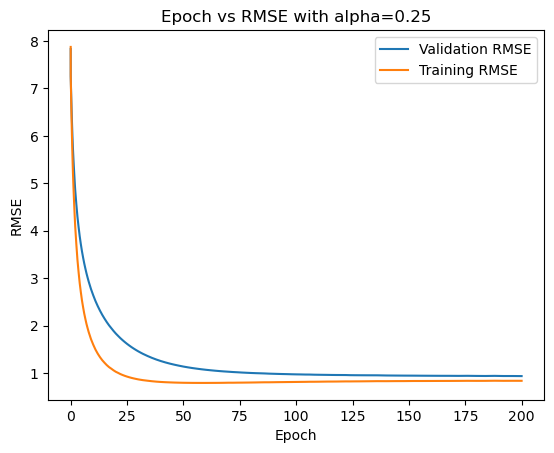

Training RMSE: 0.8378727600851046
Validation RMSE: 0.9370179371499652


In [67]:
plt.plot(model.trace_epoch, model.trace_rmse_valid, label="Validation RMSE")
plt.plot(model.trace_epoch, model.trace_rmse_train, label="Training RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title(f"Epoch vs RMSE with alpha={alpha}")
plt.legend()
plt.show()

print(f"Training RMSE: {model.trace_rmse_train[-1]}")
print(f"Validation RMSE: {model.trace_rmse_valid[-1]}")

In [66]:
# Save the parameters for later so we don't need to retrain
with open('problem1bparams.pkl', 'wb') as f:
    pickle.dump(model.param_dict, f)

# 1C

In [18]:
# For the best run at each K (with/without alpha > 0), please record that model's:
# - RMSE and MAE on the validation set
# - RMSE and MAE on the test set
# - Value of parameters mu, b, c, u, v (not needed for the report, but useful to save for later)

# You likely need to adjust the SGD step_size or n_epochs hyperparameter here. You should aim to show runs that last 
# until either training error visibly converges or until you see obvious overfitting.

# Hint: If you do see overfitting, you might consider using early stopping (by monitoring the validation set performance)
# to get the best possible model for each step above. 
# Note that optimization contains randomness, both from the initialization and from the minibatch sampling in SGD,
# but by controlling the random state you can allow your optimization to be reproducible

# TODO: implement

Next, do the report tasks:

1a) Figure and caption: RMSE vs epoch with alpha=0. 3 figures side by side, with K=2,10,50
    - Each panel should show two lines, one for train RMSE and one for validation RMSE

1b) Figure and caption: RMSE vs epoch with alpha > 0

1c) Table and caption: Report the RMSE and MAE for train, validation, and test sets for the best version of each of these latent factor models (one per row):
    - LF with K=2
    - LF with K=10
    - LF with K=50 with alpha=0
    - LF with K=50 with alpha>0

1d) Figure and caption

# 1D

In [20]:
select_movies_df = pd.read_csv(os.path.join(DATA_PATH, 'select_movies.csv'))

In [21]:
with open('problem1aparamsk2.pkl', 'rb') as f:
    bestK2params = pickle.load(f)

model = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=batch_size, step_size=0.5, n_factors=2, alpha=0.0, random_state=random_state
)
model.param_dict = bestK2params

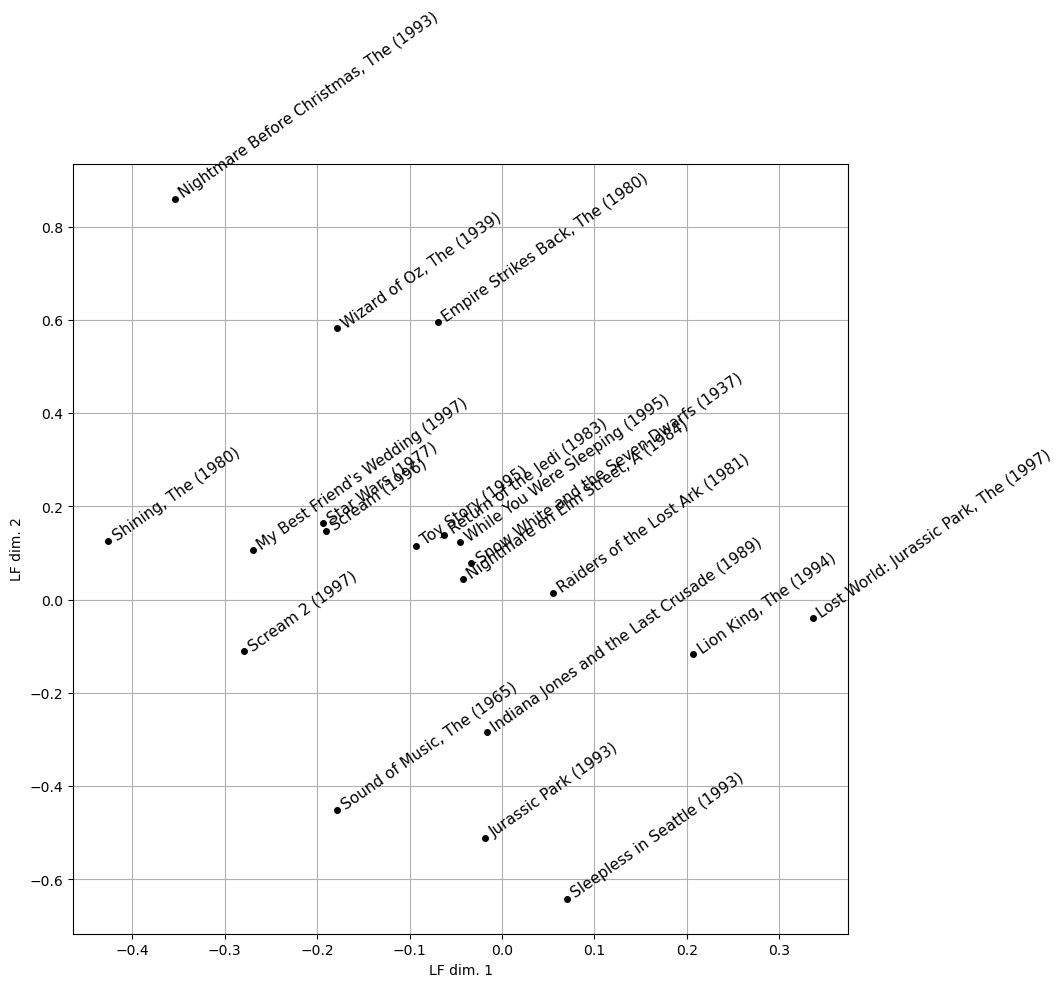

In [24]:
B = 0.002

_, _ = plt.subplots(figsize=(10., 10.));

for sid, itemid in enumerate(select_movies_df['item_id'].values):
    title = select_movies_df['title'].values[sid]
#     print(f"itemid {itemid}")
#     row_id = ag_np.flatnonzero(train_item_ids == itemid)[0]
#     print(f"rowid {row_id}")
#     movie_vec_2 = model.param_dict['V'][row_id,:]
    movie_vec_2 = model.param_dict['V'][itemid, :]
    plt.plot(movie_vec_2[0], movie_vec_2[1], 'k.', markersize=8)
    
#     if title.count("Wedding"):
#         curBy = -3 * B # manual edit to make more readable
#     else:
#         curBy = B
    curBy = B
    
    plt.text(movie_vec_2[0] + B, movie_vec_2[1] + curBy,
             title, rotation=35, fontsize=11)
    
plt.xlabel('LF dim. 1');
plt.ylabel('LF dim. 2');    
# plt.axis('equal');
plt.grid()

In [42]:
movie_df[movie_df['item_id'] == 36]

,item_id,title,release_year,orig_item_id
36,36,Nadja (1994),1994,37


In [43]:
allratingsdf = pd.read_csv(os.path.join(DATA_PATH, 'ratings_all_development_set.csv'))

In [45]:
import surprise
reader = surprise.Reader(
    line_format='user item rating', sep=',',
    rating_scale=(1, 5), skip_lines=1)
dev_set = surprise.Dataset.load_from_file(os.path.join(DATA_PATH, 'ratings_all_development_set.csv'), reader=reader)

In [47]:
dev_set_for_fit = dev_set.build_full_trainset()
dev_set_for_predict = dev_set_for_fit.build_testset()

In [48]:
model = surprise.SVD(n_factors=2, n_epochs=10, lr_all=0.01, random_state=0)
model.fit(dev_set_for_fit)

In [49]:
yhat = model.test(dev_set_for_predict)

yhat[:3]

[Prediction(uid='772', iid='36', r_ui=3.0, est=2.7544139699224877, details={'was_impossible': False}),
 Prediction(uid='772', iid='175', r_ui=4.0, est=3.6351699413391376, details={'was_impossible': False}),
 Prediction(uid='772', iid='1168', r_ui=3.0, est=2.864122198932828, details={'was_impossible': False})]

In [51]:
item_ids = []
for iid in model.trainset.all_items():
    item_ids.append(int(model.trainset.to_raw_iid(iid)))
item_ids = ag_np.asarray(item_ids)

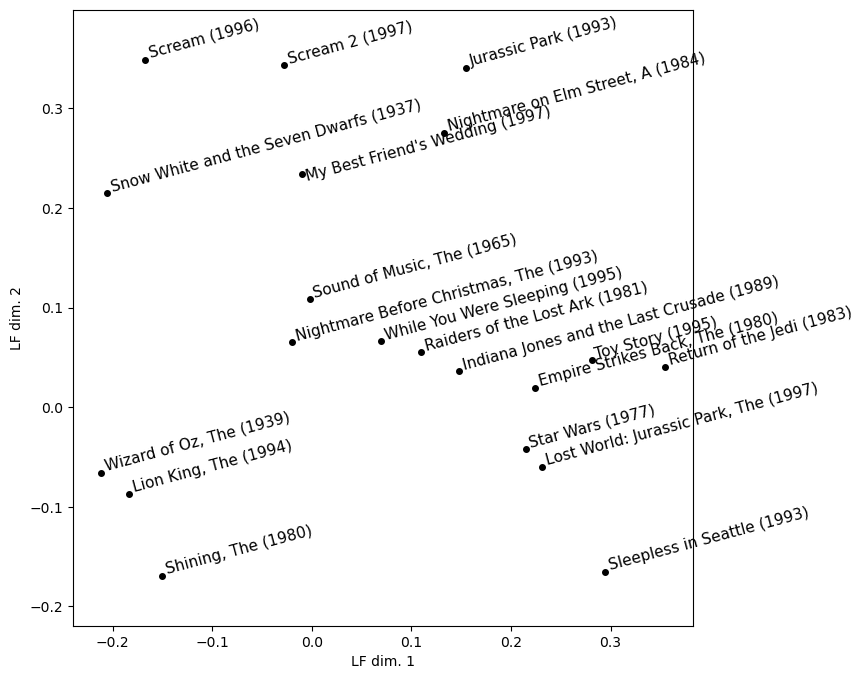

In [53]:
B = 0.002

_, _ = plt.subplots(figsize=(8., 8.));

for sid, itemid in enumerate(select_movies_df['item_id'].values):
    title = select_movies_df['title'].values[sid]
    row_id = ag_np.flatnonzero(item_ids == itemid)[0]
    movie_vec_2 = model.qi[row_id,:]
    plt.plot(movie_vec_2[0], movie_vec_2[1], 'k.', markersize=8)
    
    if title.count("Wedding"):
        curBy = -3 * B # manual edit to make more readable
    else:
        curBy = B
    
    plt.text(movie_vec_2[0] + B, movie_vec_2[1] + curBy,
             title, rotation=15, fontsize=11)
    
plt.xlabel('LF dim. 1');
plt.ylabel('LF dim. 2');    
plt.axis('equal');

# Problem 2